# Proyek Analisis Data: [Bike-Sharing-Dataset]
- **Nama:** [Riffa Bella Wahyu S]
- **Email:** [riffabella2004@gmail.com]
- **ID Dicoding:** [MC444D5X0776]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pola penggunaan sepeda pada bulan dengan frekuensi peminjaman tertinggi dan terendah?
- Pertanyaan 2 : Bagaiman pengaruh temp, hum, dan windspeed terhadap jumlah penggunaan?
- Pertanyaan 3 (opsional) : Bagaimana pola peminjaman sepeda berdasarkan jam dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [ ]:
#untuk mempercepat proses komputasi numerik
import numpy as np
#untuk memanipulasi dan menganalisis data
import pandas as pd
#untuk membuat visualisasi data
import matplotlib.pyplot as plt
#untuk membuat visualisasi data
import seaborn as sns
#untuk membaca file dalam memori tanpa perlu menyimpan secara fisik
import io

## Data Wrangling

### Gathering Data

In [ ]:
#Mengupload file dataset
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


In [ ]:
#Membaca dataset dan menampilkannya
day_df = pd.read_csv(io.BytesIO(uploaded['day.csv']))
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#Membaca dataset dan menampilkannya
hour_df = pd.read_csv(io.BytesIO(uploaded['hour.csv']))
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Melakukan proses import dataset yang akan digunakan.
- Menampilkan data penyewaan sepeda perhari dengan format csv
- Menampilkan data penyewaan sepeda perjam dengan format csv

### Assessing Data

In [ ]:
#Melakukana pemeriksaan informasi tipe data dari tiap kolom dalam day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
#Melakukana pemeriksaan informasi tipe data dari tiap kolom dalam hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
#Melakukan pemerikasaan missing value setiap kolom dalam day_df
print(day_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
#Melakukan pemerikasaan missing value setiap kolom dalam hour_df
print(hour_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
#Melakukan pemeriksaan duplikasi pada data day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
#Melakukan pemeriksaan duplikasi pada data hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Melakukan pemeriksaan statistik dari kolom numerik yang terdapat dalam day_df dan hour_df

In [ ]:
#Melakukan pemeriksaan statistik dari kolom numerik pada day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
#Melakukan pemeriksaan statistik dari kolom numerik pada hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dalam pemeriksaan tipe data dalam dy_df dan hour_df, terdapat ketidakkesesuaian tipe data pada kolom dteday yaitu object yang seharusnya menggunakan tipe data datetime
- Dalam pemeriksaan missing value, tidak terdapat missing value terhadap kedua dataset.
- Dalam pemeriksaan duplikasi, tidak terdapat duplikasi terhadap kedua dataset
- Dalam pemeriksaan statistik dari kolom numerik tidak terdapat keanehan data dalam kedua dataset

### Cleaning Data

In [ ]:
#Mengganti tipe data pada kolom dteday dalam day_df
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

#Melakukan pengecekan apakan tipe data pada dteday dalam day_df sudah berubah
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
#Mengganti tipe data pada kolom dteday dalam hour_df
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

#Melakukan pengecekan apakan tipe data pada dteday sudah berubah
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
#Menghapus semua baris yang memiliki nilai hilang pada day_df
day_df.dropna(inplace=True)

#Melakukan pengecekan apakah masih ada nilai yang hilang
print(day_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
#Menghapus semua baris yang memiliki nilai hilang pada hour_df
hour_df.dropna(inplace=True)

#Melakukan pengecekan apakah masih ada nilai yang hilang
print(hour_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Mengganti tipe data kedua dataset day_df dan hour_df pada kolom dteday, yang sebelumnya tipe datanya berisi object, menjadi tipe data datetime

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [ ]:
#Melihat rangkuman parameter statistik dari data day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [ ]:
#Melihat persebaran jumlah peminjam sepeda berdasarkan season
day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False)

,cnt
season,
3,188
2,182
1,179
4,176


In [ ]:
#Melihat pengaruh cuaca terhadap peminjaman sepeda berdasarkan musim
day_df.groupby("season").agg({
    "cnt": "sum",
    "temp": "mean",
    "hum": "mean",
    "windspeed": "mean"
})

,cnt,temp,hum,windspeed
season,,,,
1,471348,0.297748,0.582903,0.214537
2,918589,0.544405,0.626948,0.203507
3,1061129,0.706309,0.633482,0.172095
4,841613,0.422906,0.668719,0.171995


In [ ]:
#Melihat pengaruh cuaca terhadap peminjaman sepeda berdasarkan musim
day_df.groupby("mnth").agg({
    "cnt": "sum",
    "temp": "mean",
    "hum": "mean",
    "windspeed": "mean"
})

,cnt,temp,hum,windspeed
mnth,,,,
1,134933,0.236444,0.585828,0.206303
2,151352,0.299226,0.567465,0.215684
3,228920,0.390539,0.588475,0.222699
4,269094,0.469999,0.588063,0.234482
5,331686,0.594798,0.688958,0.182989
6,346342,0.684097,0.575806,0.185420
7,344948,0.755470,0.597876,0.166059
8,351194,0.708582,0.637730,0.172918
9,345991,0.616485,0.714714,0.165945


In [ ]:
#melihat demografi peminjam sepeda berdasarkan season (musim)
day_df.groupby(by="season").agg({
    "cnt": "nunique",
    "mnth": ["max", "min", "mean", "std"]
})

cnt mnth                         
       nunique  max min       mean       std
season                                      
1          179   12   1   3.093923  3.403759
2          182    6   3   4.652174  0.951671
3          188    9   6   7.691489  0.948137
4          176   12   9  10.696629  0.919402

In [ ]:
#Memilih kolom numerik
numeric_data = day_df.select_dtypes(include='number')
correlation = numeric_data.corr()
print(correlation)

             instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.412224  0.866025  0.496702  0.016145 -0.000016   
season      0.412224  1.000000 -0.001844  0.831440 -0.010537 -0.003080   
yr          0.866025 -0.001844  1.000000 -0.001792  0.007954 -0.005461   
mnth        0.496702  0.831440 -0.001792  1.000000  0.019191  0.009509   
holiday     0.016145 -0.010537  0.007954  0.019191  1.000000 -0.101960   
weekday    -0.000016 -0.003080 -0.005461  0.009509 -0.101960  1.000000   
workingday -0.004337  0.012485 -0.002013 -0.005901 -0.253023  0.035790   
weathersit -0.021477  0.019211 -0.048727  0.043528 -0.034627  0.031087   
temp        0.150580  0.334315  0.047604  0.220205 -0.028556 -0.000170   
atemp       0.152638  0.342876  0.046106  0.227459 -0.032507 -0.007537   
hum         0.016375  0.205445 -0.110651  0.222204 -0.015937 -0.052232   
windspeed  -0.112620 -0.229046 -0.011817 -0.207502  0.006292  0.014282   
casual      0.275255  0.210399  0.2485

**Insight:**
- Dengan melakukan serangkain proses eksploratory data analysis ini, untuk menjadi bahan pertimbangan saat proses visualization dan eksplanatory analysis, sehingga dapat membantu menjawab pertanyaan bisnis.


### Eksplore Data hour_df

In [ ]:
#Melihat rangkyman parameter statistik dari data hour_df
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [ ]:
#Memilih kolom numerik
numeric_data = hour_df.select_dtypes(include='number')
correlation = numeric_data.corr()
print(correlation)

             instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.404046  0.866014  0.489164 -0.004775  0.014723   
season      0.404046  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.866014 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489164  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014723 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001357 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003416  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014198 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136178  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137615  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.009577  0.150625 -0.083546  0.164411 -0.276498 -0.010588   
windspeed  -0.074505 -0.149773 -0.0087

In [ ]:
#Melihat jumlah peminjam sepeda berdasarkan jam selama sehari
hour_df.groupby(by="hr").cnt.nunique().sort_values(ascending=False)

,cnt
hr,
17,494
18,471
8,467
19,423
16,414
14,385
12,383
15,383
13,377


**Insight:**
- Dengan melakukan serangkain eksplor untuk menjadi bahan pertimbangan saat proses visualization dan eksplanatory analysis, sehingga dapat membantu menjawa pertanyaan bisnis.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
#Mengidentifikasi bulan dengan peminjaman tertinggi dan terendah
monthly_rentals = day_df.groupby("mnth")["cnt"].sum().reset_index()
highest_month = monthly_rentals.loc[monthly_rentals["cnt"].idxmax()]
lowest_month = monthly_rentals.loc[monthly_rentals["cnt"].idxmin()]
print(f"Bulan dengan peminjaman tertinggi: {highest_month}\nBulan dengan peminjaman terendah: {lowest_month}")

Bulan dengan peminjaman tertinggi: mnth         8
cnt     351194
Name: 7, dtype: int64
Bulan dengan peminjaman terendah: mnth         1
cnt     134933
Name: 0, dtype: int64


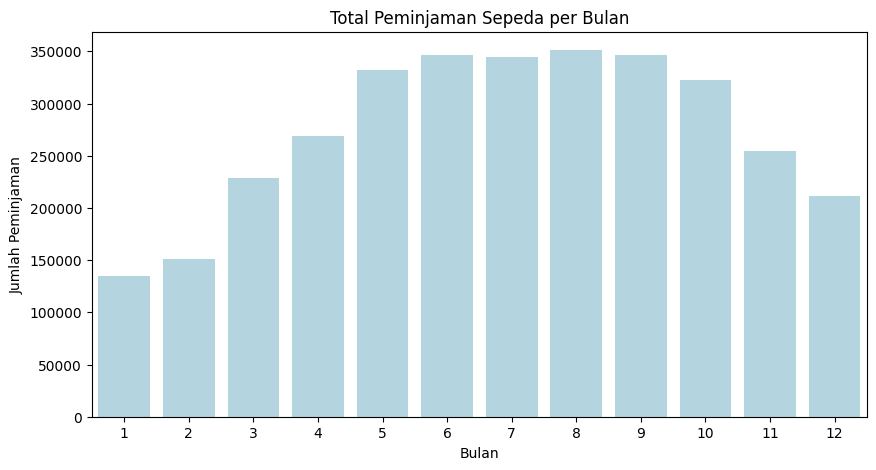

In [ ]:
#Visualisasi Bar Chart Total Peminjaman Sepeda per Bulan
plt.figure(figsize=(10, 5))
sns.barplot(x="mnth", y="cnt", data=monthly_rentals, color="#ADD8E6")  # Gunakan color, bukan palette
plt.title("Total Peminjaman Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Peminjaman")
plt.show()

### Pertanyaan 2:

In [ ]:
#Melakukan analisis pengaruh faktor cuaca dan waktu terhadapat peminjaman sepeda
correlation = day_df[['temp', 'hum', 'windspeed', 'cnt']].corr()
print("Korelasi antara faktor cuaca dan jumlah peminjaman:")
print(correlation)

Korelasi antara faktor cuaca dan jumlah peminjaman:
               temp       hum  windspeed       cnt
temp       1.000000  0.126963  -0.157944  0.627494
hum        0.126963  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.248489   1.000000 -0.234545
cnt        0.627494 -0.100659  -0.234545  1.000000


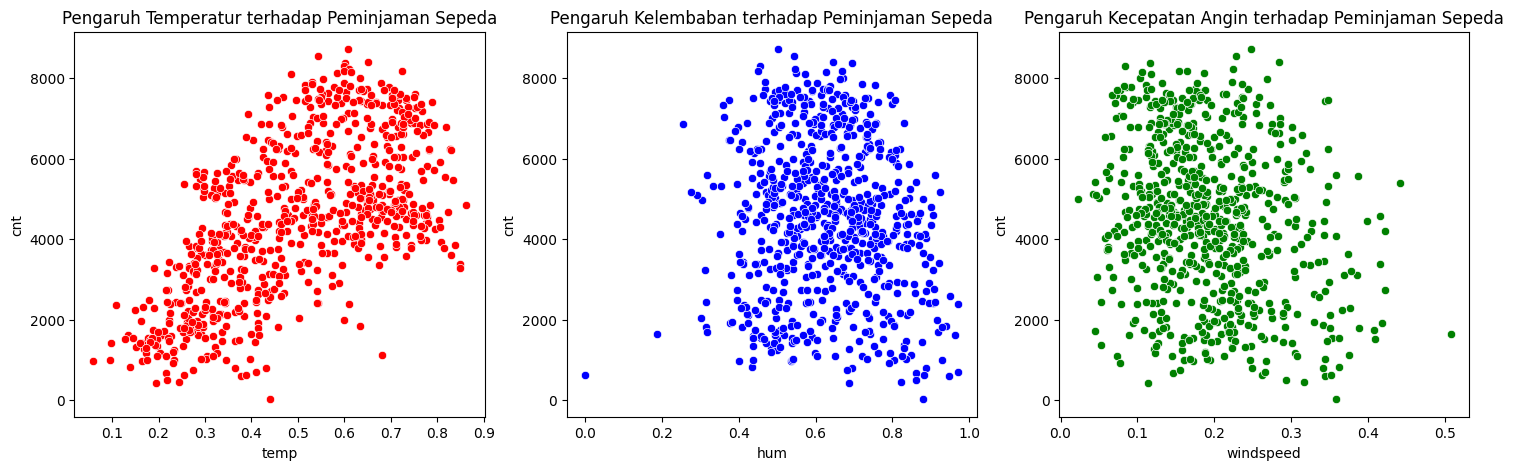

In [ ]:
# Visualisasi scatter plot hubungan faktor cuaca dengan peminjaman sepeda
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x="temp", y="cnt", data=day_df, ax=axes[0], color="red")
axes[0].set_title("Pengaruh Temperatur terhadap Peminjaman Sepeda")

sns.scatterplot(x="hum", y="cnt", data=day_df, ax=axes[1], color="blue")
axes[1].set_title("Pengaruh Kelembaban terhadap Peminjaman Sepeda")

sns.scatterplot(x="windspeed", y="cnt", data=day_df, ax=axes[2], color="green")
axes[2].set_title("Pengaruh Kecepatan Angin terhadap Peminjaman Sepeda")

plt.show()

### Pertanyaan 3

In [ ]:
#Mengelompokkan data berdasarkan jam dan menghitung jumlah unik peminjaman
hourly_rentals = hour_df.groupby(by="hr")["cnt"].sum().sort_values(ascending=False)

#Menampilkan 5 jam dengan peminjaman tertinggi
print(hourly_rentals.head(5))

hr
17    336860
18    309772
8     261001
16    227748
19    226789
Name: cnt, dtype: int64


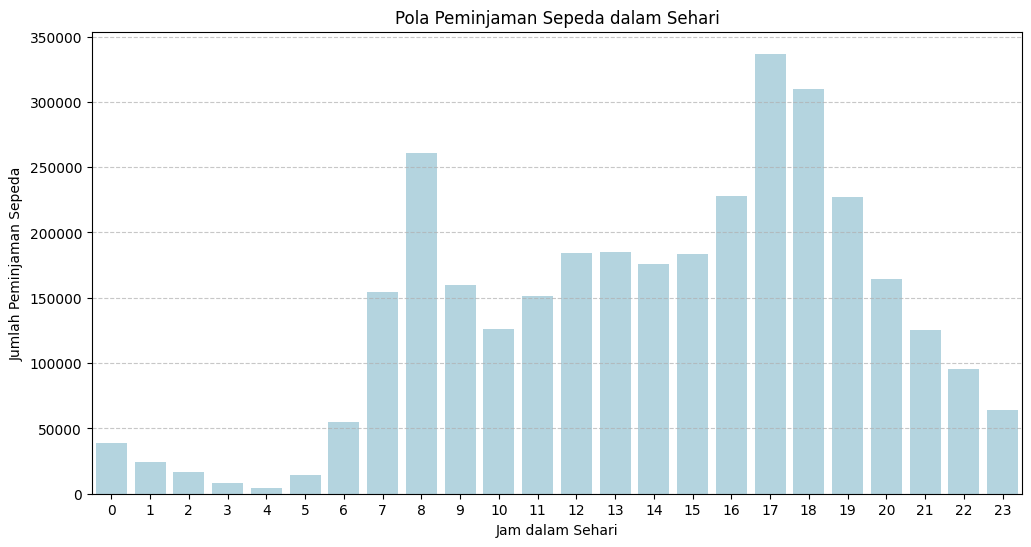

In [ ]:
#Visualisasi dengan barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_rentals.index, y=hourly_rentals.values, color="#ADD8E6")  # Warna biru muda solid

#Tambahkan detail ke grafik
plt.title("Pola Peminjaman Sepeda dalam Sehari")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.xticks(rotation=0)  # Pastikan jam ditampilkan dengan baik
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**
- Pada petanyaan pertama, proses menampilkan analisis dan proses kedua menampilkan visualisasinya. Hasilnya adalah peminjaman sepeda tertinggi berada di bulan ke-8 yaitu Agustus dan peminjaman terendah berada di bulan ke-1 yaitu Januari.
- Pada pertanyaan kedua, proses menampilkan hasil analisis dalam bentuk korelasi sehingga sulit untuk secara langsung memahami pola hubungan antara variabel. Oleh karena itu, diperlukan tahap kedua dengan melakukan visualisasi data menggunakan scatter plot.
- Pada pertanyaan ketiga, proses analisis menampilkan hasil 5 jam dengan jumlah peminjaman sepeda tertinggi. Kemudian melakukan visualisasi data peminjaman selama 24 jam dalam sehari.

## Analisis Lanjutan (Opsional)

In [ ]:
# Konversi tanggal ke format datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Menghitung Recency: Selisih hari terakhir dalam dataset dengan setiap tanggal peminjaman
latest_date = day_df["dteday"].max()
day_df["recency"] = (latest_date - day_df["dteday"]).dt.days

# Menghitung Frequency: Rata-rata jumlah peminjaman per bulan
freq_per_month = day_df.groupby("mnth")["cnt"].count().reset_index()
freq_per_month.columns = ["month", "frequency"]

# Menghitung Monetary: Total peminjaman per bulan
monetary_per_month = day_df.groupby("mnth")["cnt"].sum().reset_index()
monetary_per_month.columns = ["month", "monetary"]

# Menggabungkan RFM Metrics
rfm_df = freq_per_month.merge(monetary_per_month, on="month")
rfm_df["recency"] = day_df.groupby("mnth")["recency"].min().values

print(rfm_df)

    month  frequency  monetary  recency
0       1         62    134933      335
1       2         57    151352      306
2       3         62    228920      275
3       4         60    269094      245
4       5         62    331686      214
5       6         60    346342      184
6       7         62    344948      153
7       8         62    351194      122
8       9         60    345991       92
9      10         62    322352       61
10     11         60    254831       31
11     12         62    211036        0


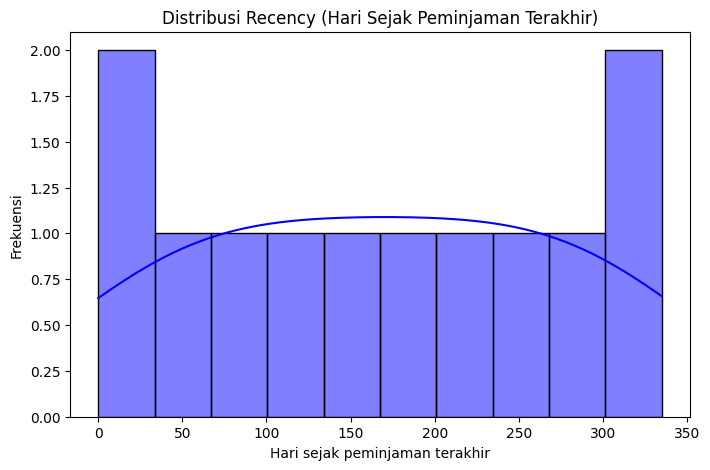

In [ ]:
#Melihat Seberapa baru peminjaman sepeda (Recency)
plt.figure(figsize=(8, 5))
sns.histplot(rfm_df["recency"], bins=10, kde=True, color="blue")
plt.title("Distribusi Recency (Hari Sejak Peminjaman Terakhir)")
plt.xlabel("Hari sejak peminjaman terakhir")
plt.ylabel("Frekuensi")
plt.show()

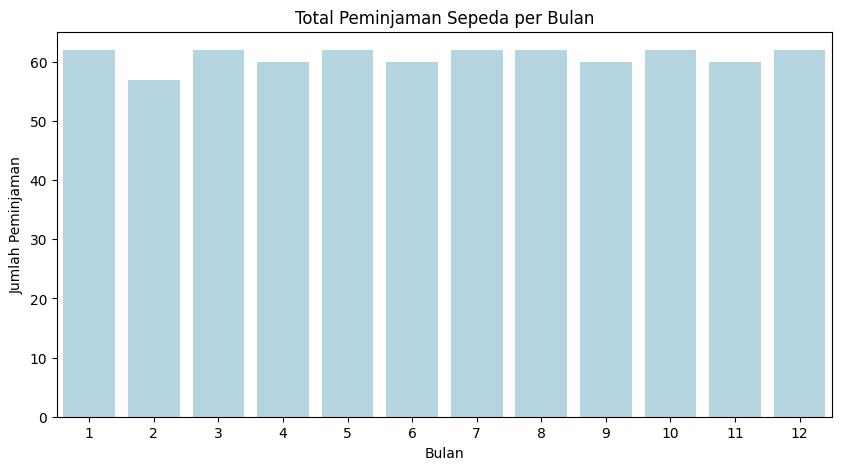

In [ ]:
#Melihat Frequency Bulan dengan peminjaman sepeda tertinggi dan terendah
plt.figure(figsize=(10, 5))
sns.barplot(x="month", y="frequency", data=rfm_df, color="#ADD8E6")
plt.title("Total Peminjaman Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Peminjaman")
plt.show();

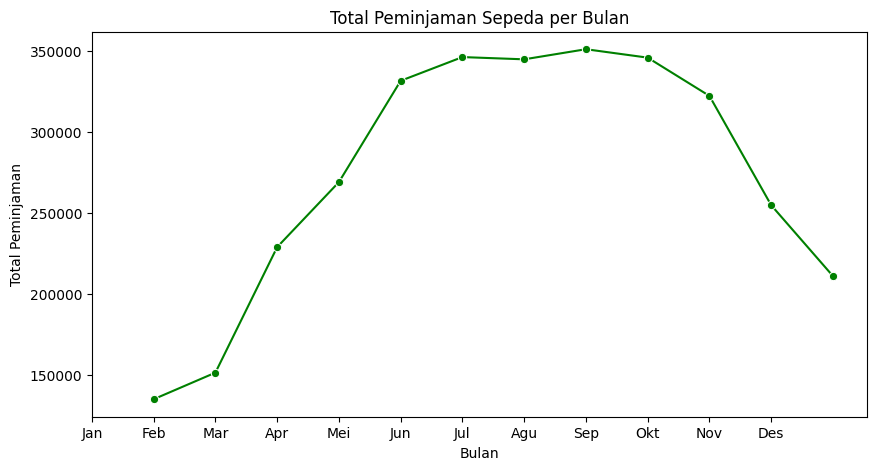

In [ ]:
#Melihat total peminjaman sepeda per bulan
plt.figure(figsize=(10, 5))
sns.lineplot(x="month", y="monetary", data=rfm_df, marker="o", color="green")
plt.title("Total Peminjaman Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Total Peminjaman")
plt.xticks(range(0, 12), ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Dari hasil visualisasi data terbentuk pola yang memiliki kemungkinan besar dipengaruhi oleh musim dan faktor cuaca. Bulan Agustus sering kali memiliki cuaca yang lebih baik, sementara Januari berada di musim dingin yang membuat orang cenderung mengurangi aktivitas luar ruangan. Oleh karena itu, hasil yang diperoleh adalah peminjaman sepeda tertinggi berada di bulan ke-8 yaitu Agustus dan peminjaman terendah berada di bulan ke-1 yaitu Januari.
- Conclution pertanyaan 2 : Terlihat pada visualisasi data yang dihasilkan,bahwa pola hubungan naik, maka peminjaman sepeda meningkat seiring naiknya variabel cuaca. Sebaliknya, jika pola menurun, maka variabel cuaca berdampak negatif terhadap peminjaman. Berdasarkan hasil ini, terlihat bahwa faktor suhu (temp) yang lebih tinggi cdnderung meningkatkan jumlah peminjaman sepeda.
- Conclution pertanyaan 3 : Dari hasil visualisasi, terlihat bahwa jam dengan peminjaman tertinggi pada pukul 17.00 (5 sore). Namun, karena hasil ini hanya menunjukkan sebagian kecil dari tren harian, diperlukan visualisasi data untuk memberikan gambaran lengkap tentang pola peminjaman sepeda selama 24 jam dalam sehari.

## Unduh Berkas Data

In [ ]:
# Pastikan kolom "dteday" dalam format datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# Gabungkan dataset berdasarkan tanggal (dteday)
all_df = pd.merge(hour_df, day_df, on="dteday", suffixes=("_hourly", "_daily"))


In [ ]:
#Simpan file
all_df.to_csv("all_data.csv", index=False)